# Performing DEG analysis (limma, R) on Pseudobulking from atlas
* Primary tumour samples only

In [1]:
library(limma)
library(edgeR)

In [2]:
# set directory
setwd('/scratch/user/s4436039/scdata/Pseudobulk')

## Load data (starting with just mregDC):

In [3]:
#load data
sampleinfo <- read.csv("pseudobulk_metadata_mregDC.csv", row.names =1)
head(sampleinfo)

,cancer_broadest
,<chr>
GGSE223063_GLIO_1,GBM
GSE112271_HCC_Pt13,HCC
GSE112271_HCC_Pt14,HCC
GSE131907_LUAD_T0006,NSCLC
GSE131907_LUAD_T0008,NSCLC
GSE131907_LUAD_T0009,NSCLC


In [4]:
dim(sampleinfo)

[1] 333   1

In [5]:
cts_mregDC <- read.csv("pseudobulk_mregDC_data.csv", row.names = 1)

In [6]:
head(cts_mregDC)

,GGSE223063_GLIO_1,GSE112271_HCC_Pt13,GSE112271_HCC_Pt14,GSE131907_LUAD_T0006,GSE131907_LUAD_T0008,GSE131907_LUAD_T0009,GSE131907_LUAD_T0018,GSE131907_LUAD_T0019,GSE131907_LUAD_T0020,GSE131907_LUAD_T0025,⋯,PMID32561858_breast_51,PRJCA005422_HGSOC1_PT,PRJCA005422_HGSOC2_PT,PRJCA005422_HGSOC3_PT,PRJCA005422_HGSOC4_PT,PRJCA005422_HGSOC6_PT,PRJCA005422_HGSOC7_PT,PRJCA005422_HGSOC8_PT,PRJCA005422_HGSOC9_PT,PRJCA005422_HGSOC10_PT
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FAM87B,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
LINC00115,0,0,0,0,0,0,0,0,0,1,⋯,0,0,0,0,0,0,1,0,0,0
FAM41C,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
SAMD11,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
NOC2L,2,0,3,3,5,0,2,5,3,4,⋯,4,1,1,1,2,0,1,0,0,0
KLHL17,0,0,0,0,0,0,0,0,0,0,⋯,1,0,0,0,0,0,0,0,0,0


In [7]:
dim(cts_mregDC)

[1] 15074   333

In [8]:
# set genes variables
genes <- data.frame(Symbol = row.names(cts_mregDC))

In [9]:
# create DGEList variable
y <- DGEList(counts = cts_mregDC, genes = genes)

In [10]:
head(y)

An object of class "DGEList"
$counts
          GGSE223063_GLIO_1 GSE112271_HCC_Pt13 GSE112271_HCC_Pt14
FAM87B                    0                  0                  0
LINC00115                 0                  0                  0
FAM41C                    0                  0                  0
SAMD11                    0                  0                  0
NOC2L                     2                  0                  3
KLHL17                    0                  0                  0
          GSE131907_LUAD_T0006 GSE131907_LUAD_T0008 GSE131907_LUAD_T0009
FAM87B                       0                    0                    0
LINC00115                    0                    0                    0
FAM41C                       0                    0                    0
SAMD11                       0                    0                    0
NOC2L                        3                    5                    0
KLHL17                       0                    0                    0
          GSE131907_LUAD_T0018 GSE131907_LUAD_T0019 GSE131907_LUAD_T0020
FAM87B                       0                    0                    0
LINC00115                    0                    0                    0
FAM41C                       0                    0                    0
SAMD11                       0                    0                    0
NOC2L                        2                    5                    3
KLHL17                       0                    0                    0
          GSE131907_LUAD_T0025 GSE131907_LUAD_T0028 GSE131907_LUAD_T0030
FAM87B                       0                    0                    0
LINC00115                    1                    1                    0
FAM41C                       0                    0                    2
SAMD11                       0                    0                    0
NOC2L                        4                    0                    3
KLHL17                       0                    0                    3
          GSE131907_LUAD_T0031 GSE131907_LUAD_T0034 GSE131907_LUAD_T1028
FAM87B                       0                    0                    0
LINC00115                    0                    0                    0
FAM41C                       0                    0                    0
SAMD11                       0                    0                    0
NOC2L                        2                    0                    0
KLHL17                       0                    0                    0
          GSE131907_LUAD_T1058 GSE139324_HNSCC_1 GSE139324_HNSCC_2
FAM87B                       0                 0                 0
LINC00115                    0                 0                 1
FAM41C                       0                 1                 0
SAMD11                       0                 0                 0
NOC2L                        2                 1                 0
KLHL17                       0                 3                 0
          GSE139324_HNSCC_3 GSE139324_HNSCC_4 GSE139324_HNSCC_5
FAM87B                    0                 0                 0
LINC00115                 1                 1                 0
FAM41C                    0                 1                 0
SAMD11                    0                 0                 0
NOC2L                     3                 0                 1
KLHL17                    0                 0                 0
          GSE139324_HNSCC_6 GSE139324_HNSCC_7 GSE139324_HNSCC_8
FAM87B                    0                 0                 0
LINC00115                 0                 0                 0
FAM41C                    1                 0                 0
SAMD11                    0                 0                 0
NOC2L                     4                 4                 3
KLHL17                    1                 0                 0
          GSE139324_HNSCC_9 GSE139324_HNSCC_10 GSE139324_HNSCC_11
FAM87B                    

In [11]:
dim(y)

[1] 15074   333

## Filtering:

In [12]:
# Keep genes with total counts more than 50.
A <- rowSums(y$counts)
isexpr <- A > 50

In [13]:
# Keep only genes with defined annotation:
hasannot <- rowSums(is.na(y$genes)) == 0

In [14]:
y <- y[isexpr & hasannot, , keep.lib.size = FALSE]
dim(y)

[1] 10018   333

## Normalise: 

In [15]:
y <- calcNormFactors(y)

In [16]:
head(y)

An object of class "DGEList"
$counts
          GGSE223063_GLIO_1 GSE112271_HCC_Pt13 GSE112271_HCC_Pt14
LINC00115                 0                  0                  0
NOC2L                     2                  0                  3
KLHL17                    0                  0                  0
HES4                      0                  2                 12
ISG15                     0                  5                 36
AGRN                      1                  0                  2
          GSE131907_LUAD_T0006 GSE131907_LUAD_T0008 GSE131907_LUAD_T0009
LINC00115                    0                    0                    0
NOC2L                        3                    5                    0
KLHL17                       0                    0                    0
HES4                         0                    1                    0
ISG15                        4                    2                    8
AGRN                         0                    3                    0
          GSE131907_LUAD_T0018 GSE131907_LUAD_T0019 GSE131907_LUAD_T0020
LINC00115                    0                    0                    0
NOC2L                        2                    5                    3
KLHL17                       0                    0                    0
HES4                         3                    2                    7
ISG15                        5                   18                   11
AGRN                         2                    1                    0
          GSE131907_LUAD_T0025 GSE131907_LUAD_T0028 GSE131907_LUAD_T0030
LINC00115                    1                    1                    0
NOC2L                        4                    0                    3
KLHL17                       0                    0                    3
HES4                         1                    0                    2
ISG15                        6                    4                   10
AGRN                         1                    0                    1
          GSE131907_LUAD_T0031 GSE131907_LUAD_T0034 GSE131907_LUAD_T1028
LINC00115                    0                    0                    0
NOC2L                        2                    0                    0
KLHL17                       0                    0                    0
HES4                         0                    0                    0
ISG15                        0                    1                    2
AGRN                         1                    1                    0
          GSE131907_LUAD_T1058 GSE139324_HNSCC_1 GSE139324_HNSCC_2
LINC00115                    0                 0                 1
NOC2L                        2                 1                 0
KLHL17                       0                 3                 0
HES4                         0                 0                 0
ISG15                        2                 1                 2
AGRN                         0                 1                 0
          GSE139324_HNSCC_3 GSE139324_HNSCC_4 GSE139324_HNSCC_5
LINC00115                 1                 1                 0
NOC2L                     3                 0                 1
KLHL17                    0                 0                 0
HES4                      4                 0                 1
ISG15                    14                29                 0
AGRN                      0                 0                 1
          GSE139324_HNSCC_6 GSE139324_HNSCC_7 GSE139324_HNSCC_8
LINC00115                 0                 0                 0
NOC2L                     4                 4                 3
KLHL17                    1                 0                 0
HES4                      1                 5                 0
ISG15                    22                35                 2
AGRN                      5                 0                 1
          GSE139324_HNSCC_9 GSE139324_HNSCC_10 GSE139324_HNSCC_11
LINC00115                 

# Multi-dimensional scaling (MDS) plot to visualise relationship between samples

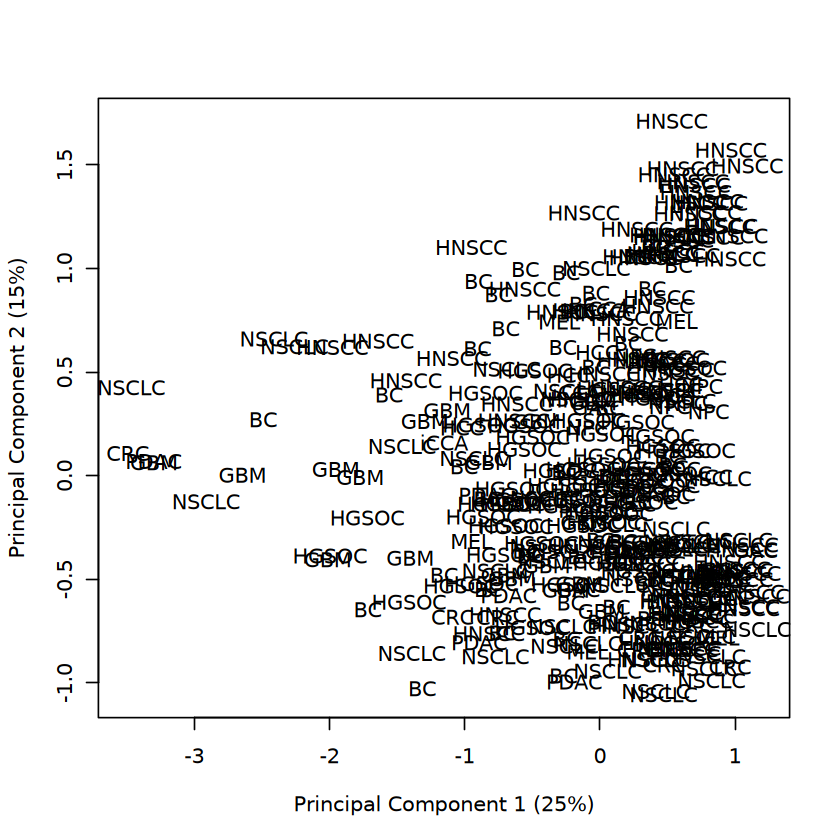

In [17]:
plotMDS(y, labels=sampleinfo$cancer_broadest, top=50, gene.selection="common", prior.count = 5)

In [22]:
library(RColorBrewer)

In [42]:
# create vector of colours for cancer types
cancer_types <- unique(sampleinfo$cancer_broadest)
colors <- brewer.pal(n = length(cancer_types), name = "Paired")

In [43]:
# set each cancer type to a colour
cancer_colors <- setNames(colors, cancer_types)

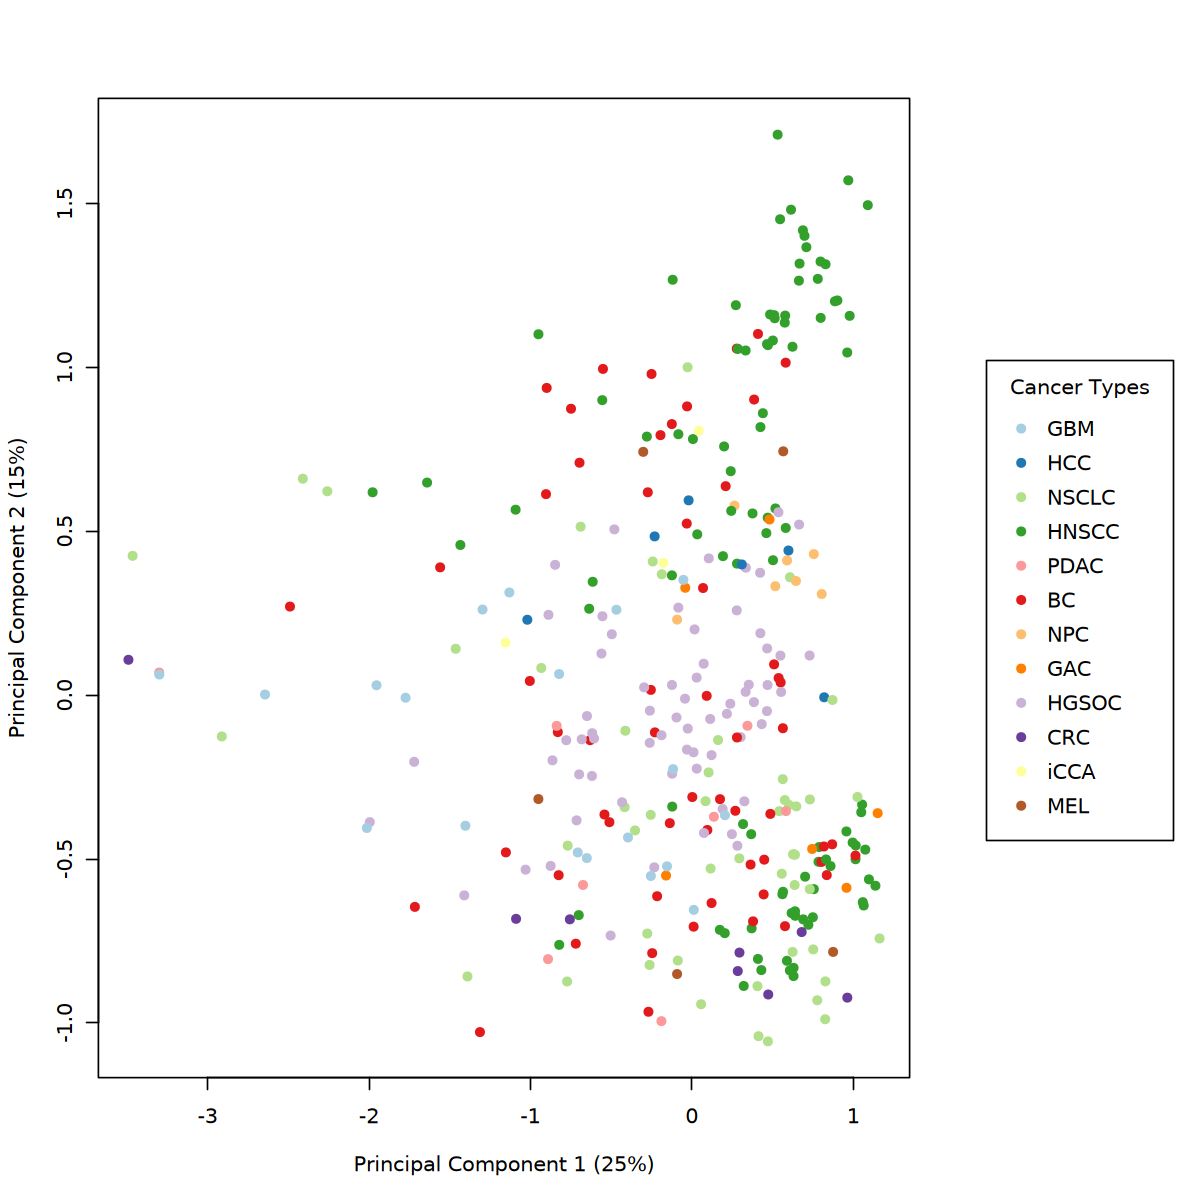

In [44]:
layout(matrix(1:2, ncol = 2), widths = c(4, 1))  # Allocate space for the plot and legend

# Generate the MDS plot
plotMDS(y, 
        #labels = sampleinfo$cancer_broadest, 
        labels = NULL,
        col = cancer_colors[sampleinfo$cancer_broadest], 
        pch = 16,
        top = 50, 
        gene.selection = "common", 
        prior.count = 5)

# Add a legend
par(mar = c(0, 0, 0, 0))  # Remove margins for the legend area
plot.new()               
legend("center",                        
       legend = cancer_types,                 
       col = colors,                        
       pch = 16,                               
       title = "Cancer Types")               